<a href="https://colab.research.google.com/github/PankajSingh0018/Machine-Learning-Projects/blob/main/ml_project_draft1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine-Learning-Logistic-Regression-Problem

Use the "Run" button to execute the code.

In [5]:
!pip install jovian --upgrade --quiet

In [6]:
import jovian

# Don't Get Kicked! 
Predict if a car purchased at auction is a lemon

This notebook is a solution to the kaggle challenge of Don't Get Kicked!

One of the biggest challenges of an auto dealership purchasing a used car at an auto auction is the risk of that the vehicle might have serious issues that prevent it from being sold to customers. The auto community calls these unfortunate purchases "kicks".

Kicked cars often result when there are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problem. Kick cars can be very costly to dealers after transportation cost, throw-away repair work, and market losses in reselling the vehicle.

Modelers who can figure out which cars have a higher risk of being kick can provide real value to dealerships trying to provide the best inventory selection possible to their customers.

The challenge of this competition is to predict if the car purchased at the Auction is a Kick (bad buy).

Dataset Link- https://www.kaggle.com/competitions/DontGetKicked

## Download the Dataset 
- Install required Libraries
- Download the data from the source
- View Dataset files
- Load training set with Pandas 
- Load test set with Pandas

### Install Required Libraries

In [130]:
!pip install pyyaml==5.4.1 --quiet
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet


     |████████████████████████████████| 193.6 MB 65 kB/s 
     |████████████████████████████████| 47 kB 4.5 MB/s 
     |████████████████████████████████| 2.0 MB 35.9 MB/s 
     |████████████████████████████████| 9.7 MB 49.1 MB/s 


### Downloading the Dataset from Kaggle 

I'll be using the opendatasets library to download the dataset from the platform

In [8]:
import opendatasets as od 

In [9]:
url='https://www.kaggle.com/competitions/DontGetKicked/code'

In [10]:
%%time
od.download(url)

Skipping, found downloaded files in "./DontGetKicked" (use force=True to force download)
CPU times: user 524 µs, sys: 114 µs, total: 638 µs
Wall time: 646 µs


As you can see that the dataset has been successfully downloaded.

### View Dataset Files

In [11]:
data_dir= './DontGetKicked/'

In [12]:
# Listing the files with Total Size of the file
!ls -lh {data_dir}

total 29M
-rw-r--r-- 1 root root 2.8K Dec 28 01:58 Carvana_Data_Dictionary.txt
-rw-r--r-- 1 root root 450K Dec 28 01:58 example_entry.csv
-rw-r--r-- 1 root root 9.2M Dec 28 01:58 test.csv
-rw-r--r-- 1 root root 2.0M Dec 28 01:58 test.zip
-rw-r--r-- 1 root root  14M Dec 28 01:58 training.csv
-rw-r--r-- 1 root root 2.9M Dec 28 01:58 training.zip


In [13]:
# Training Dataset 
!head {data_dir}/training.csv

RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155,9829,11636,13600,7451,8552,11597,12409,NULL,NULL,21973,33619,FL,7100,0,1113
2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854,8383,10897,12572,7456,9222,11374,12791,NULL,NULL,19638,33619,FL,7600,0,1053
3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202,4760,694

In [14]:
# Test Dataset
!head {data_dir}/test.csv

RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1,Alloy,85377,AMERICAN,LARGE,GM,5032,6386,5935,7397,4905,6181,8557,9752,NULL,NULL,18881,30212,GA,6500,0,2152
73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1,Alloy,61873,AMERICAN,MEDIUM,GM,4502,5685,5362,6640,4645,5710,7562,9296,NULL,NULL,18111,30212,GA,6300,0,1118
73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244,13041,11564,14584,10883,1

In [15]:
#Sample Submission 
!head {data_dir}/example_entry.csv

RefId,IsBadBuy
73015,0
73016,0
73017,0
73018,0
73019,0
73020,0
73021,0
73022,0
73023,0


In [16]:
# No. of lines in the training dataset
!wc -l {data_dir}/training.csv

72984 ./DontGetKicked//training.csv


In [17]:
# No of lines in the Test Dataset
!wc -l {data_dir}/test.csv

48708 ./DontGetKicked//test.csv


In [18]:
!wc -l {data_dir}/example_entry.csv

48708 ./DontGetKicked//example_entry.csv


**Observations:**

-------------------------------------
- This is a Supervised Machine Learning Regression Problem
- The Training dataset has 72k rows.
- The Test has 48k of rows of data.
- The Test has all the coulmn except the target column.
- The example_entry file is our sample submission file.



### Loading Dataset


**Importing required Libraries**

In [19]:
import pandas as pd 
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import random 

pd.set_option("display.max_columns", None)

In [20]:
%%time
df= pd.read_csv(data_dir +"/training.csv")
test_df=pd.read_csv(data_dir+"/test.csv")
submission_df=pd.read_csv(data_dir+"/example_entry.csv")

CPU times: user 387 ms, sys: 59.4 ms, total: 447 ms
Wall time: 449 ms


#### Exploring Dataset Properties 

##### Training Dataset

In [21]:
df.head(5)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [22]:
df.shape

(72983, 34)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [24]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


**Observations-**

-------------------------------------------------------

- The vehicle age ranges fom 0 to 9  years that are present in our dataset.
 
- The Vehicle Odometer has the values from mere 4825(KM or miles) to 82436 (KMs or MIles)

- Here we are assuming **0** in IsBadBuy as **False** and **1** as **True** as standard Boolean operation.

- There are quite few missing value in the Dataset which we deal later on in the project.



##### Test Dataset Exploration

In [25]:
test_df.head(5)

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,73015,12/2/2009,ADESA,2005,4,PONTIAC,GRAND PRIX,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,85377,AMERICAN,LARGE,GM,5032.0,6386.0,5935.0,7397.0,4905.0,6181.0,8557.0,9752.0,NaN,NaN,18881,30212,GA,6500.0,0,2152
1,73016,12/2/2009,ADESA,2005,4,CHEVROLET,MALIBU V6,LS,4D SEDAN LS,SILVER,AUTO,1.0,Alloy,61873,AMERICAN,MEDIUM,GM,4502.0,5685.0,5362.0,6640.0,4645.0,5710.0,7562.0,9296.0,NaN,NaN,18111,30212,GA,6300.0,0,1118
2,73017,12/2/2009,ADESA,2006,3,DODGE,DURANGO 2WD V8,Adv,4D SUV 4.7L ADVENTURER,SILVER,AUTO,1.0,Alloy,69283,AMERICAN,MEDIUM SUV,CHRYSLER,10244.0,13041.0,11564.0,14584.0,10883.0,12166.0,15340.0,16512.0,NaN,NaN,18111,30212,GA,9700.0,0,1215
3,73018,12/2/2009,ADESA,2002,7,SATURN,L SERIES,L20,4D SEDAN L200,GOLD,AUTO,1.0,Alloy,87889,AMERICAN,MEDIUM,GM,2558.0,3542.0,3263.0,4325.0,2928.0,3607.0,5725.0,6398.0,NaN,NaN,18881,30212,GA,4150.0,0,1933
4,73019,12/2/2009,ADESA,2007,2,HYUNDAI,ACCENT,GS,2D COUPE GS,BLUE,AUTO,NaN,NaN,73432,OTHER ASIAN,COMPACT,OTHER,5013.0,6343.0,5914.0,7350.0,5013.0,6343.0,5914.0,7350.0,NaN,NaN,18111,30212,GA,4100.0,0,920


In [26]:
test_df.shape

(48707, 33)

In [27]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48707 entries, 0 to 48706
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              48707 non-null  int64  
 1   PurchDate                          48707 non-null  object 
 2   Auction                            48707 non-null  object 
 3   VehYear                            48707 non-null  int64  
 4   VehicleAge                         48707 non-null  int64  
 5   Make                               48707 non-null  object 
 6   Model                              48707 non-null  object 
 7   Trim                               47157 non-null  object 
 8   SubModel                           48702 non-null  object 
 9   Color                              48703 non-null  object 
 10  Transmission                       48704 non-null  object 
 11  WheelTypeID                        46519 non-null  flo

In [28]:
test_df.describe()

,RefId,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,48707.000000,48707.000000,48707.000000,46519.000000,48707.000000,48697.000000,48697.000000,48697.000000,48697.000000,48564.000000,48564.000000,48564.000000,48564.000000,48707.000000,48707.000000,48707.000000,48707.000000,48707.000000
mean,97378.396144,2005.331533,4.215801,1.462198,71576.351448,6134.883997,7393.486313,8550.143869,9920.585662,6112.367247,7382.808994,8812.130014,10195.801334,25432.898906,54198.092636,6760.866483,0.022009,1281.105755
std,14067.338432,1.730500,1.704778,0.516574,14487.934950,2453.918764,2715.515852,3130.915999,3361.101528,2427.325384,2682.991119,3062.179799,3285.030551,24137.133174,26053.831141,1757.034461,0.146715,612.003001
min,73015.000000,2001.000000,0.000000,1.000000,223.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,3106.000000,1625.000000,0.000000,462.000000
25%,85195.500000,2004.000000,3.000000,1.000000,62226.500000,4283.000000,5432.000000,6378.000000,7579.000000,4247.000000,5391.000000,6622.000000,7876.000000,17212.000000,32750.000000,5480.000000,0.000000,853.000000
50%,97378.000000,2005.000000,4.000000,1.000000,73412.000000,6115.000000,7308.000000,8495.000000,9881.000000,6050.000000,7280.000000,8749.000000,10136.000000,19638.000000,40509.000000,6730.000000,0.000000,1209.000000
75%,109560.500000,2007.000000,5.000000,2.000000,82419.500000,7755.000000,9044.000000,10666.000000,12184.000000,7677.000000,9028.000000,10869.250000,12374.000000,21973.000000,78219.000000,7935.000000,0.000000,1623.000000
max,121746.000000,2010.000000,9.000000,3.000000,114786.000000,27584.000000,30843.000000,32456.000000,35754.000000,27009.000000,30516.000000,31677.000000,36036.000000,99791.000000,98064.000000,56950.000000,1.000000,7498.000000


**Observations -**

---------------------------------------------------------------------------
 
 - The test dataset does not contains the ```IsBadBuy``` column.
 - The test dataset has the ```2001``` as the oldest car make year and ```2010``` as the newest .
 - The maximum Warranty Cost for the test dataset is around 7500 ($ probably)



## Exploratory Data Analysis

**Let' check the properties of each column of the dataset**

In [29]:
print ( "Dataset Description :-\n" )
with open(data_dir+"/Carvana_Data_Dictionary.txt")as F:
  print(F.read())

Dataset Description :-

Field Name				Definition
RefID				        Unique (sequential) number assigned to vehicles
IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
PurchDate				The Date the vehicle was Purchased at Auction
Auction					Auction provider at which the  vehicle was purchased
VehYear					The manufacturer's year of the vehicle
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers
MMRAcquisitionAucti

**Let's first check the total number of Bad Buys Count**

In [30]:
Bad_buy_df=df["IsBadBuy"].value_counts()

In [31]:
fig= px.histogram(Bad_buy_df,
                  x=["No","Yes"],
                  y= Bad_buy_df,
                  nbins=2,
                  template='plotly_dark',
                  labels={'x':"Is a Bad Buy ",'y':"Count"},
                title='Bad Buy or NOT')
fig.show()

**Insights-** 

-------------------------------------------------------------------


- Here we have total of ```64000 ``` of data that are good buys and only ```8970``` of data as a bad buy.
- This shows that mostly the cars that are bought are good cars and not a bad buy.

**Let's check the Vehicle age distribution**

In [32]:
fig = px.histogram(df,
                  x='VehicleAge',
                  marginal='box',
                  title='Distribution of Vehicle Age')
fig.update_layout(bargap=0.05)
fig.show();

**Insights-** 

-------------------------------------------------------------------
- From the age distribution we can say it is following a normal distribution but the data is somewhat rightly skewed.
- As we can check the distribution almost over ```17000``` numbers of cars are aged ```4 years``` which is the most in numbers.
- We have only ```646``` cars that are the oldest with the age ``` 9 years```

**Let's check the correleation of each column with one another**

**According to the rule of ```correlation coefficients```, the strongest correlation is considered when the value is closest to +1 (positive correlation) or -1 (negative correlation)**. 

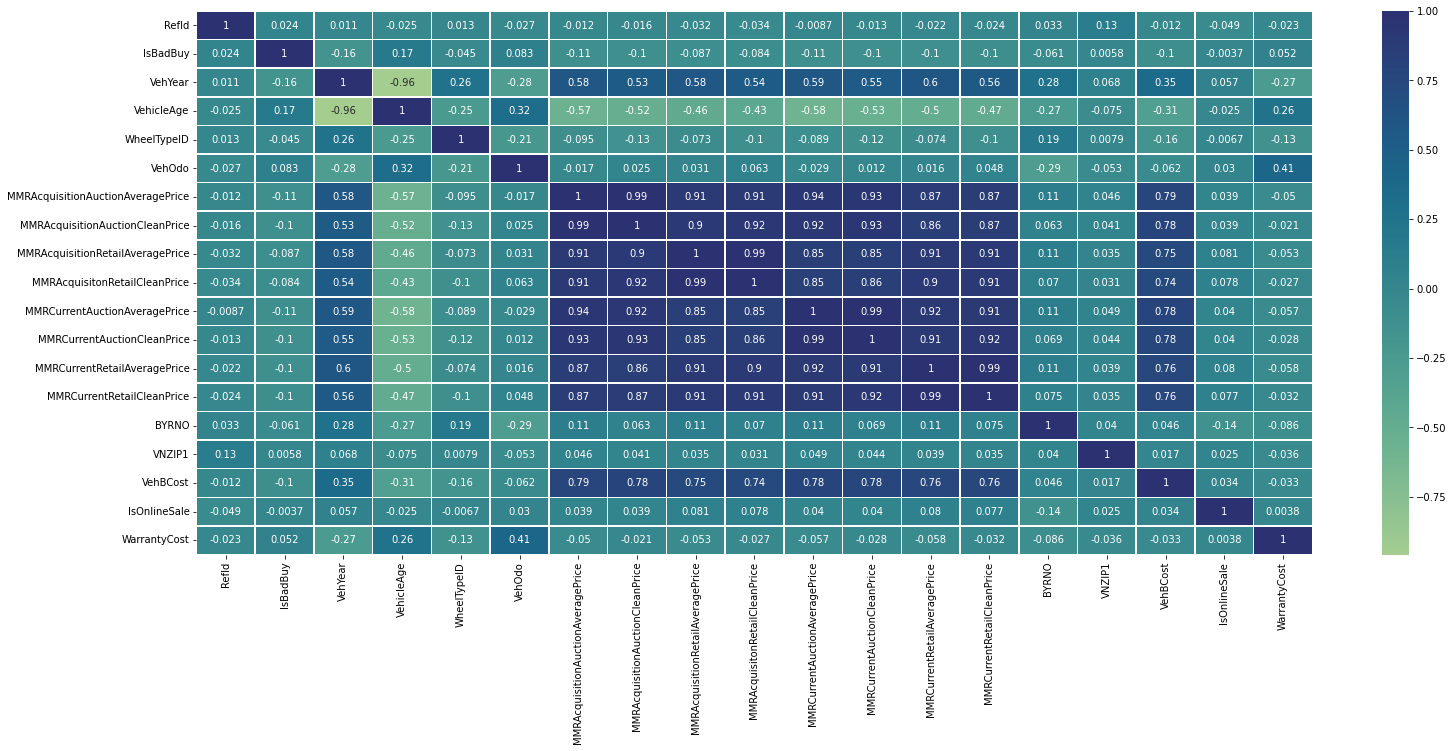

In [33]:
corr= df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,cmap='crest',annot=True, linewidths=.5)
plt.show()

**Insights-** 

-------------------------------------------------------------------
- From the above heatmap we can clearly see a strong correlation between the ```MMR Prices``` among themselves.
- From the heatmap we can clearly see that here is almost no correlation between ```ISBADBUY``` and ```WHEELTYPEID```, ```BYRNO```,```WINZIP1```.

In [34]:
df.shape, test_df.shape

((72983, 34), (48707, 33))

**Let's check the most number of Car models that are bad buys**

In [35]:
fig=px.histogram(df,
             x = "Make",
             color="IsBadBuy")
fig.show()

- The given Dataset does not have a alot of Yes for IsBadBuy column (alot of zeros denoting bad buy).

- Maximum cars comming for resale is 1-4 yrs old are  mostly considered a good buy compared to the ones which are 4-7 years old.

- Ford, Dodge and Chevrolet cars have a high chance of being a bad buy

## Data Imputation and Pre-Porcessing

### Feature Selections 

In [36]:
test_df.sample(2)

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
8813,81831,11/16/2010,ADESA,2006,4,CHRYSLER,PT CRUISER,Tou,4D SEDAN TOURING,SILVER,AUTO,2.0,Covers,72931,AMERICAN,MEDIUM,CHRYSLER,4166.0,5239.0,7706.0,8699.0,5188.0,6253.0,8578.0,9847.0,NaN,NaN,8655,64012,MO,5290.0,0,1389
18736,91759,12/16/2010,MANHEIM,2006,4,NISSAN,ALTIMA,Bas,4D SEDAN,GREY,AUTO,2.0,Covers,80814,TOP LINE ASIAN,MEDIUM,OTHER,6776.0,8298.0,10507.0,11963.0,7724.0,9063.0,10844.0,12664.0,NO,GREEN,52646,22403,VA,7520.0,0,723


In [37]:
DF=df.copy()

In [38]:
# Since our dataset has many Features, here I am selecting only those features which are most likely to contribute towards the accuracy
# of the dataset 

unique_cols = ['RefId','BYRNO']
veh_categories = ['VNZIP1','PurchDate', 'Make', 'Model', 'SubModel', 'Trim', 'VNST', 'Color'] 
wheel_type = ['WheelTypeID']
'''high_correlation = [ 'MMRCurrentAuctionCleanPrice',    # 99% corr with MMRCurrentAuctionAveragePrice
                    'MMRCurrentRetailCleanPrice',      # 99% corr with MMRCurrentRetailAveragePrice
                    'MMRAcquisitionAuctionCleanPrice', # 99% corr with MMRAcquisitionAuctionAveragePrice
                    'MMRAcquisitonRetailCleanPrice',    # 99% corr with MMRQcquisitionRetailAverageprice
                    'VehYear'                          # 96% corr with 'VehicleAge'
                   ]'''
columns_to_drop = unique_cols + veh_categories + wheel_type 
DF.drop(columns_to_drop,axis=1,inplace=True)
test_df.drop(columns_to_drop,axis=1,inplace=True)

In [39]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           72983 non-null  int64  
 1   Auction                            72983 non-null  object 
 2   VehYear                            72983 non-null  int64  
 3   VehicleAge                         72983 non-null  int64  
 4   Transmission                       72974 non-null  object 
 5   WheelType                          69809 non-null  object 
 6   VehOdo                             72983 non-null  int64  
 7   Nationality                        72978 non-null  object 
 8   Size                               72978 non-null  object 
 9   TopThreeAmericanName               72978 non-null  object 
 10  MMRAcquisitionAuctionAveragePrice  72965 non-null  float64
 11  MMRAcquisitionAuctionCleanPrice    72965 non-null  flo

In [40]:
test_df.sample(10)

,Auction,VehYear,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost
16409,MANHEIM,2005,5,AUTO,Alloy,78863,AMERICAN,MEDIUM SUV,GM,7997.0,9982.0,11694.0,14161.0,6774.0,8486.0,11106.0,12714.0,NaN,NaN,8250.0,0,1155
26419,MANHEIM,2007,2,AUTO,Covers,73373,AMERICAN,CROSSOVER,CHRYSLER,9205.0,11169.0,13676.0,15414.0,9433.0,11245.0,13603.0,15318.0,NaN,NaN,8680.0,0,1857
42292,MANHEIM,2004,6,AUTO,Covers,85532,AMERICAN,VAN,CHRYSLER,3993.0,5132.0,7091.0,8312.0,3805.0,5011.0,7254.0,8343.0,NaN,NaN,6020.0,0,1763
27948,MANHEIM,2004,6,AUTO,Covers,81483,OTHER ASIAN,MEDIUM,OTHER,4254.0,5459.0,6859.0,8323.0,4518.0,5753.0,7150.0,8586.0,NaN,NaN,5755.0,0,594
9624,ADESA,2007,3,AUTO,Covers,96956,AMERICAN,MEDIUM,GM,6046.0,7251.0,9074.0,10435.0,6218.0,7348.0,9524.0,10626.0,NaN,NaN,5160.0,0,909
27181,MANHEIM,2005,4,AUTO,Alloy,60812,AMERICAN,LARGE,GM,5500.0,6920.0,6440.0,7974.0,5500.0,6920.0,6440.0,7974.0,NaN,NaN,7305.0,0,1703
15810,MANHEIM,2006,3,AUTO,Alloy,48866,AMERICAN,MEDIUM,GM,6881.0,8242.0,7931.0,9401.0,6837.0,8532.0,7884.0,9715.0,NaN,NaN,6665.0,0,764
10874,ADESA,2006,4,AUTO,Covers,43192,AMERICAN,MEDIUM,CHRYSLER,4215.0,5314.0,7395.0,8524.0,3741.0,4906.0,6818.0,7760.0,NaN,NaN,5990.0,0,834
34720,OTHER,2001,8,AUTO,Alloy,75249,AMERICAN,COMPACT,FORD,2528.0,3273.0,3230.0,4035.0,3821.0,4771.0,4627.0,5653.0,NaN,NaN,3325.0,0,1455
19055,MANHEIM,2005,4,AUTO,Covers,50312,AMERICAN,VAN,CHRYSLER,4856.0,6312.0,5744.0,7317.0,4856.0,6312.0,5744.0,7317.0,NaN,NaN,6195.0,0,1251


In [41]:
targets=DF['IsBadBuy']
DF.drop('IsBadBuy',axis=1,inplace=True)

### Fill Or Remove Missing Values

Since we have a lot of missing data in our dataset, we need to either remove the missing values , keep them as it if they are not going to make any impact on the model or impute those values.



In [42]:
DF.isna().sum()

Auction                                  0
VehYear                                  0
VehicleAge                               0
Transmission                             9
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanPrice            315
MMRCurrentRetailAveragePrice           315
MMRCurrentRetailCleanPrice             315
PRIMEUNIT                            69564
AUCGUART                             69564
VehBCost                                 0
IsOnlineSale                             0
WarrantyCost                             0
dtype: int64

In [43]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Auction                            72983 non-null  object 
 1   VehYear                            72983 non-null  int64  
 2   VehicleAge                         72983 non-null  int64  
 3   Transmission                       72974 non-null  object 
 4   WheelType                          69809 non-null  object 
 5   VehOdo                             72983 non-null  int64  
 6   Nationality                        72978 non-null  object 
 7   Size                               72978 non-null  object 
 8   TopThreeAmericanName               72978 non-null  object 
 9   MMRAcquisitionAuctionAveragePrice  72965 non-null  float64
 10  MMRAcquisitionAuctionCleanPrice    72965 non-null  float64
 11  MMRAcquisitionRetailAveragePrice   72965 non-null  flo

In [44]:
raw_df=DF.copy()
raw_df.head(2)


,Auction,VehYear,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost
0,ADESA,2006,3,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,7100.0,0,1113
1,ADESA,2004,5,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,7600.0,0,1053


In [45]:
# let's first separate the numeric column from categorical 
cat_feature=raw_df.select_dtypes(include='object').columns.tolist()
num_features= raw_df.select_dtypes(exclude='object').columns.tolist()

In [46]:
# Now replace the numerical values with the mean value using the Simple Imputer method 
from sklearn.impute import SimpleImputer
impute_mean =SimpleImputer(strategy='mean');

In [47]:
impute_mean.fit(raw_df[num_features]);
raw_df[num_features]=impute_mean.transform(raw_df[num_features])


In [48]:
test_df[num_features]=impute_mean.transform(test_df[num_features])

In [49]:
 raw_df.isna().sum()

Auction                                  0
VehYear                                  0
VehicleAge                               0
Transmission                             9
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice        0
MMRAcquisitionAuctionCleanPrice          0
MMRAcquisitionRetailAveragePrice         0
MMRAcquisitonRetailCleanPrice            0
MMRCurrentAuctionAveragePrice            0
MMRCurrentAuctionCleanPrice              0
MMRCurrentRetailAveragePrice             0
MMRCurrentRetailCleanPrice               0
PRIMEUNIT                            69564
AUCGUART                             69564
VehBCost                                 0
IsOnlineSale                             0
WarrantyCost                             0
dtype: int64

In [50]:
# Let's impute the categorical missing value by adding unknown as the value
for feature in cat_feature:
    raw_df[feature].fillna('Unknown',inplace=True)
    test_df[feature].fillna('Unknown',inplace=True)

In [51]:
 raw_df.isna().sum()

Auction                              0
VehYear                              0
VehicleAge                           0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
PRIMEUNIT                            0
AUCGUART                             0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

In [52]:
test_df.isna().sum()

Auction                              0
VehYear                              0
VehicleAge                           0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
PRIMEUNIT                            0
AUCGUART                             0
VehBCost                             0
IsOnlineSale                         0
WarrantyCost                         0
dtype: int64

**All missing Values are imputed using the ```Sklearn Simple Imputer```**

### Features Scaling -

------------------------------------------------------------------------------

Here we are going to use the ``MinMaxScaler`` From ``Sklearn.preprocessing`` to scale the values to the ``(0,1)`` range.

In [53]:
from sklearn.preprocessing import MinMaxScaler


In [54]:
Scaler=MinMaxScaler()

In [55]:
Scaler.fit(raw_df[num_features])

MinMaxScaler()

In [56]:
raw_df[num_features]=Scaler.transform(raw_df[num_features])

In [57]:
test_df[num_features]=Scaler.transform(test_df[num_features])

In [58]:
print('Minimum:')
list(Scaler.data_min_)

Minimum:


[2001.0, 0.0, 4825.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 462.0]

In [59]:
print('Maximum:')
list(Scaler.data_max_)

Maximum:


[2010.0,
 9.0,
 115717.0,
 35722.0,
 36859.0,
 39080.0,
 41482.0,
 35722.0,
 36859.0,
 39080.0,
 41062.0,
 45469.0,
 1.0,
 7498.0]

In [60]:
raw_df[num_features].describe()

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.482561,0.464072,0.601261,0.171572,0.200050,0.217427,0.237475,0.171661,0.200512,0.224558,0.247075,0.148015,0.025280,0.115773
std,0.192361,0.190246,0.131469,0.068912,0.073853,0.080755,0.081611,0.068006,0.072722,0.078916,0.080442,0.038881,0.156975,0.085112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.514122,0.119618,0.146694,0.160722,0.180657,0.119954,0.147183,0.167605,0.189859,0.119513,0.000000,0.053297
50%,0.444444,0.444444,0.618043,0.170707,0.198188,0.216121,0.236006,0.170091,0.198812,0.223976,0.246310,0.147334,0.000000,0.098493
75%,0.666667,0.555556,0.699879,0.217373,0.244743,0.272518,0.291404,0.216449,0.244337,0.278838,0.299742,0.173727,0.000000,0.165009
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### One Hot Encoding for the Categorical Dataset

In [61]:
from sklearn.preprocessing import OneHotEncoder


In [62]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore')


In [63]:
encoder.fit(raw_df[cat_feature])


OneHotEncoder(handle_unknown='ignore', sparse=False)

In [64]:
encoder.categories_



[array(['ADESA', 'MANHEIM', 'OTHER'], dtype=object),
 array(['AUTO', 'MANUAL', 'Manual', 'Unknown'], dtype=object),
 array(['Alloy', 'Covers', 'Special', 'Unknown'], dtype=object),
 array(['AMERICAN', 'OTHER', 'OTHER ASIAN', 'TOP LINE ASIAN', 'Unknown'],
       dtype=object),
 array(['COMPACT', 'CROSSOVER', 'LARGE', 'LARGE SUV', 'LARGE TRUCK',
        'MEDIUM', 'MEDIUM SUV', 'SMALL SUV', 'SMALL TRUCK', 'SPECIALTY',
        'SPORTS', 'Unknown', 'VAN'], dtype=object),
 array(['CHRYSLER', 'FORD', 'GM', 'OTHER', 'Unknown'], dtype=object),
 array(['NO', 'Unknown', 'YES'], dtype=object),
 array(['GREEN', 'RED', 'Unknown'], dtype=object)]

In [65]:
encoded_cols = list(encoder.get_feature_names_out(cat_feature))
print(encoded_cols)

['Auction_ADESA', 'Auction_MANHEIM', 'Auction_OTHER', 'Transmission_AUTO', 'Transmission_MANUAL', 'Transmission_Manual', 'Transmission_Unknown', 'WheelType_Alloy', 'WheelType_Covers', 'WheelType_Special', 'WheelType_Unknown', 'Nationality_AMERICAN', 'Nationality_OTHER', 'Nationality_OTHER ASIAN', 'Nationality_TOP LINE ASIAN', 'Nationality_Unknown', 'Size_COMPACT', 'Size_CROSSOVER', 'Size_LARGE', 'Size_LARGE SUV', 'Size_LARGE TRUCK', 'Size_MEDIUM', 'Size_MEDIUM SUV', 'Size_SMALL SUV', 'Size_SMALL TRUCK', 'Size_SPECIALTY', 'Size_SPORTS', 'Size_Unknown', 'Size_VAN', 'TopThreeAmericanName_CHRYSLER', 'TopThreeAmericanName_FORD', 'TopThreeAmericanName_GM', 'TopThreeAmericanName_OTHER', 'TopThreeAmericanName_Unknown', 'PRIMEUNIT_NO', 'PRIMEUNIT_Unknown', 'PRIMEUNIT_YES', 'AUCGUART_GREEN', 'AUCGUART_RED', 'AUCGUART_Unknown']


In [66]:
raw_df[encoded_cols] = encoder.transform(raw_df[cat_feature])
test_df[encoded_cols] = encoder.transform(test_df[cat_feature])

In [67]:
raw_df.sample(10)

,Auction,VehYear,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Transmission_AUTO,Transmission_MANUAL,Transmission_Manual,Transmission_Unknown,WheelType_Alloy,WheelType_Covers,WheelType_Special,WheelType_Unknown,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Nationality_Unknown,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_Unknown,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,TopThreeAmericanName_Unknown,PRIMEUNIT_NO,PRIMEUNIT_Unknown,PRIMEUNIT_YES,AUCGUART_GREEN,AUCGUART_RED,AUCGUART_Unknown
70143,ADESA,0.555556,0.444444,AUTO,Covers,0.642562,AMERICAN,MEDIUM,CHRYSLER,0.141873,0.168046,0.209698,0.229786,0.155394,0.181747,0.221853,0.239370,Unknown,Unknown,0.123142,0.0,0.131751,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
41373,MANHEIM,0.666667,0.333333,MANUAL,Covers,0.677028,TOP LINE ASIAN,COMPACT,OTHER,0.210682,0.233864,0.294908,0.299986,0.189015,0.215822,0.266658,0.283328,Unknown,Unknown,0.149424,0.0,0.015208,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
53721,OTHER,0.777778,0.111111,AUTO,Covers,0.387494,AMERICAN,MEDIUM,CHRYSLER,0.185488,0.192463,0.195906,0.196760,0.195454,0.210939,0.267912,0.276411,Unknown,Unknown,0.142936,0.0,0.072911,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
29093,OTHER,0.444444,0.444444,AUTO,Covers,0.596427,AMERICAN,VAN,FORD,0.130984,0.140807,0.220496,0.221470,0.130032,0.146070,0.220087,0.231455,Unknown,Unknown,0.116544,0.0,0.148380,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17562,MANHEIM,0.222222,0.777778,AUTO,Alloy,0.694468,AMERICAN,LARGE TRUCK,CHRYSLER,0.176306,0.217016,0.258547,0.289162,0.155114,0.188828,0.239355,0.272417,Unknown,Unknown,0.195720,0.0,0.116686,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3085,OTHER,0.333333,0.555556,AUTO,Covers,0.600999,AMERICAN,MEDIUM,GM,0.153687,0.192382,0.164509,0.196664,0.152791,0.189560,0.163639,0.195948,Unknown,Unknown,0.150963,0.0,0.015208,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
53561,OTHER,0.777778,0.111111,AUTO,Covers,0.375419,AMERICAN,MEDIUM,CHRYSLER,0.218577,0.228167,0.228582,0.231016,0.200577,0.210668,0.210798,0.216404,Unknown,Unknown,0.164929,0.0,0.032831,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
67201,ADESA,0.444444,0.555556,AUTO,Covers,0.545396,OTHER ASIAN,MEDIUM,OTHER,0.083114,0.103774,0.159647,0.166651,0.098063,0.116607,0.172979,0.181871,Unknown,Unknown,0.114344,0.0,0.010091,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
35630,MANHEIM,0.333333,0.555556,AUTO,Alloy,0.610738,AMERICAN,MEDIUM,GM,0.148676,0.187932,0.159570,0.192397,0.147444,0.179956,0.1583

In [68]:
test_df.sample(4)

,Auction,VehYear,VehicleAge,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,VehBCost,IsOnlineSale,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Transmission_AUTO,Transmission_MANUAL,Transmission_Manual,Transmission_Unknown,WheelType_Alloy,WheelType_Covers,WheelType_Special,WheelType_Unknown,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Nationality_Unknown,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_Unknown,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,TopThreeAmericanName_Unknown,PRIMEUNIT_NO,PRIMEUNIT_Unknown,PRIMEUNIT_YES,AUCGUART_GREEN,AUCGUART_RED,AUCGUART_Unknown
2096,ADESA,0.666667,0.222222,AUTO,Covers,0.526422,AMERICAN,MEDIUM,GM,0.168356,0.194254,0.255297,0.267321,0.181233,0.203044,0.271469,0.298670,Unknown,Unknown,0.125781,0.0,0.037806,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
35630,MANHEIM,0.666667,0.333333,AUTO,Covers,0.574225,OTHER ASIAN,MEDIUM,OTHER,0.215022,0.225508,0.289944,0.288270,0.176754,0.203261,0.247211,0.261970,Unknown,Unknown,0.168668,0.0,0.010091,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19191,MANHEIM,0.444444,0.444444,AUTO,Alloy,0.505059,AMERICAN,LARGE TRUCK,CHRYSLER,0.261436,0.302179,0.270880,0.302035,0.264487,0.307740,0.273900,0.310506,Unknown,Unknown,0.225631,0.0,0.051592,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2183,ADESA,0.555556,0.444444,AUTO,Unknown,0.378233,AMERICAN,MEDIUM,CHRYSLER,0.119394,0.147155,0.205732,0.222603,0.119394,0.147155,0.205732,0.224879,Unknown,Unknown,0.132819,0.0,0.052871,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Finalising the Dataset 

In [69]:
raw_df=raw_df[num_features+encoded_cols]
test_df=test_df[num_features+encoded_cols]


In [70]:
raw_df.sample()

,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Transmission_AUTO,Transmission_MANUAL,Transmission_Manual,Transmission_Unknown,WheelType_Alloy,WheelType_Covers,WheelType_Special,WheelType_Unknown,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Nationality_Unknown,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_Unknown,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,TopThreeAmericanName_Unknown,PRIMEUNIT_NO,PRIMEUNIT_Unknown,PRIMEUNIT_YES,AUCGUART_GREEN,AUCGUART_RED,AUCGUART_Unknown
44458,0.555556,0.333333,0.262526,0.224092,0.254917,0.234007,0.25669,0.241448,0.265661,0.251151,0.269714,0.186373,0.0,0.059693,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Spliting Dataset using SkLearn Model Selection

In [71]:
from sklearn.model_selection import train_test_split


In [72]:
inputs,val_inputs,targets,val_targets = train_test_split(raw_df,targets,test_size=0.20, random_state=42)


## Machine Learning Models

### Base Model

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
base_model=np.zeros(len(inputs))
accuracy_score(base_model,targets)

0.8761860720035625

The accuracy_score function computes the accuracy, either the fraction or the count of correct predictions.

**Let's build a Random num function to see how it compare**

In [75]:
def random_guess(inputs):
  return np.random.choice([0, 1], len(inputs))

In [76]:
outs=random_guess(inputs)
outs

array([1, 1, 1, ..., 0, 1, 0])

In [77]:
accuracy_score(outs,targets)

0.4998972356386805

## Model 1- Logistic Regression Model 

In [78]:
from sklearn.linear_model import LogisticRegression 

In [79]:
model = LogisticRegression(solver = 'liblinear', random_state = 42)
model.fit(inputs, targets)


LogisticRegression(random_state=42, solver='liblinear')

In [80]:
print("Training Accuracy:",model.score(inputs,targets))
print("\nValidation Accuracy:",model.score(val_inputs,val_targets))


Training Accuracy: 0.8942554722022402

Validation Accuracy: 0.8972391587312462



**Let's import the confusion Matrix from Sklearn**

In [81]:
from sklearn.metrics import confusion_matrix


In [82]:
train_pred=model.predict(inputs)

In [83]:
confusion_matrix(targets, train_pred, normalize='true')

array([[0.98719628, 0.01280372],
       [0.76345276, 0.23654724]])

**Helper Function**

In [84]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
        
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    prob= model.predict_proba(inputs)[0]
    print(prob)
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 89.43%
[0.94492769 0.05507231]


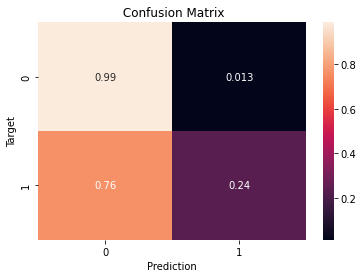

In [85]:
training_preds = predict_and_plot(inputs, targets)


Accuracy: 89.72%
[0.84646933 0.15353067]


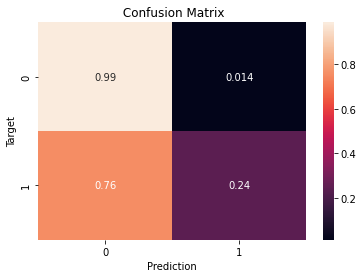

In [86]:
val_preds = predict_and_plot(val_inputs, val_targets)


In [87]:
test_preds=model.predict(test_df)

In [88]:
test_preds

array([0, 0, 0, ..., 0, 0, 0])

Let's save this test predictions in the sample file provided in the dataset files that we have downloaded and submit it on the kaggle compition page.

In [89]:
submission_df

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0
...,...,...
48702,121742,0
48703,121743,0
48704,121744,0
48705,121745,0


In [90]:
submission_df['IsBadBuy']=test_preds
submission_df.to_csv('Submissions.csv',index=False)

## Model 2- Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier


In [92]:
tree = DecisionTreeClassifier(max_depth=20,random_state=42)

In [93]:
tree.fit(inputs,targets)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [94]:
train_accuracy= tree.score(inputs,targets)
validattion_accuracy= tree.score(val_inputs, val_targets)

In [95]:
train_accuracy

0.9520432980509026

In [96]:
validattion_accuracy

0.8596286908268822

**Let's Tune the Hyperparameters to improve the accuracy**



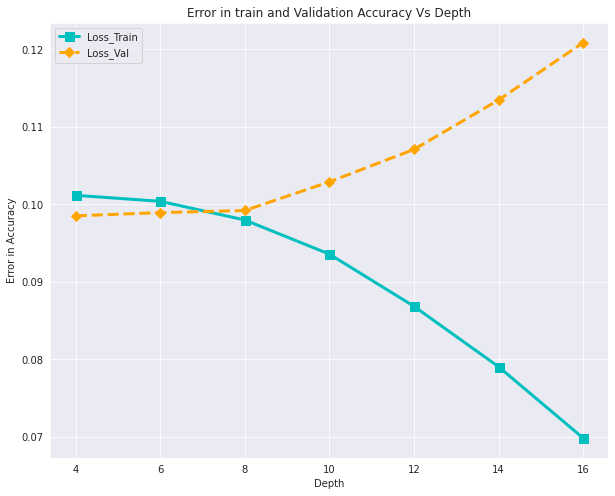

In [97]:
def max_depth(min,max):
  depth=[]
  trai_acc=[]
  vali_acc=[]
  for i in range (min,max,2):
    model = DecisionTreeClassifier(max_depth=i, random_state=42)
    model.fit(inputs,targets)
    depth.append(i)
    trai_acc.append(model.score(inputs,targets))
    vali_acc.append(model.score(val_inputs,val_targets))

  trai_acc=1-np.array(trai_acc)
  vali_acc=1-np.array(vali_acc)

  plt.figure(figsize=(10,8))
  sns.set_style('darkgrid')
  plt.title('Error in train and Validation Accuracy Vs Depth')
  plt.xlabel('Depth')
  plt.ylabel('Error in Accuracy')
  plt.plot(depth,trai_acc ,'cs-',linewidth=3,markersize=9)
  plt.plot(depth,vali_acc,'D--',color='orange',linewidth=3, markersize=7)
  plt.legend(['Loss_Train','Loss_Val']);
  plt.show()

max_depth(4,18)

In [98]:
model1 = DecisionTreeClassifier(max_depth=6,random_state=42,max_features=0.9,class_weight={0:1,1:2})
model1.fit(inputs,targets)
print("Train_acc:",model1.score(inputs,targets)," | Val_acc:",model1.score(val_inputs,val_targets))

Train_acc: 0.8986572123454253  | Val_acc: 0.9003219839693087


In [99]:
DT= DecisionTreeClassifier(max_depth=7,random_state=42)

In [100]:
DT.fit(inputs,targets)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [101]:
train_acc= DT.score(inputs,targets)
val_acc=DT.score(val_inputs,val_targets)


In [102]:
train_acc,val_acc

(0.9006268626040489, 0.9009385490169213)

In [103]:
test_preds=model.predict(test_df)
submission_df['IsBadBuy']=test_preds
submission_df.to_csv('Decision_tree_Submission.csv',index=False)

**Let's create a helper function to be called to try different models for enhancing the accuracy**
 


In [104]:
def Models(model):
  # First fit the model
  model.fit(inputs,targets)

  # Now generate the accuracy 
  train_acc= accuracy_score(inputs,targets)
  val_acc=accuracy_score(val_inputs,val_targets)

  print('Train Accuracy', train_acc)
  print('\nVal Accuracy', val_acc)

  return(train_acc, val_acc)

## Model 3- Random Forest Classifier

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
RFC= RandomForestClassifier(n_jobs=-1,n_estimators=20,max_depth=20,random_state=42)

In [107]:
RFC.fit(inputs,targets)

RandomForestClassifier(max_depth=20, n_estimators=20, n_jobs=-1,
                       random_state=42)

In [108]:
training_acc=RFC.score(inputs,targets)
validation_acc=RFC.score(val_inputs,val_targets)

In [109]:
print(f"Training accuracy with the Random Forest is {training_acc}")

Training accuracy with the Random Forest is 0.9436680026033638


In [110]:
print(f"Validation accuracy with the Random Forest is {validation_acc}")

Validation accuracy with the Random Forest is 0.9010755634719463


## **Hyperparameter tuning**

In [111]:

from sklearn.ensemble import RandomForestClassifier
def test_params(**params):
    RFC1 = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(inputs, targets)
    train_acc=RFC1.score(inputs,targets)
    val_acc=RFC1.score(val_inputs,val_targets)
    return train_acc, val_acc

In [112]:
test_params(n_estimators=20, max_depth=20)

(0.9436680026033638, 0.9010755634719463)

In [113]:
%%time
test_params(n_estimators=100, max_depth=20, min_samples_leaf=3,min_samples_split=2)


CPU times: user 19.1 s, sys: 171 ms, total: 19.3 s
Wall time: 13.9 s


(0.9113143561812763, 0.9017606357470713)

In [114]:
def test_model(**params):
        model=RandomForestClassifier(**params)
        model.fit(inputs,targets)
        # print(" | Train_acc: ",model.score(inputs,targets)," | Val_acc: ",model.score(val_inputs,val_targets) ) 
        return model.score(inputs,targets),model.score(val_inputs,val_targets)

def test_and_plot(param_name, param_values, **other_params):
        train_accL = []
        val_accL =[]
        for value in param_values:
          params = dict(other_params)
          params[param_name] = value
          train_acc, val_acc = test_model(**params)
          train_accL.append(train_acc)
          val_accL.append(val_acc)

        plt.figure(figsize = (10, 5))
        plt.plot(param_values, train_accL, 'b-o')

        plt.plot(param_values, val_accL, 'r-o')
        plt.title('Overfitting Curve ' + param_name)
        plt.xlabel(param_name)
        plt.ylabel('Accuracy')
        plt.legend(['Training', 'Validation'])

best_params = {
    'random_state': 42,
    'n_jobs': -1,
}

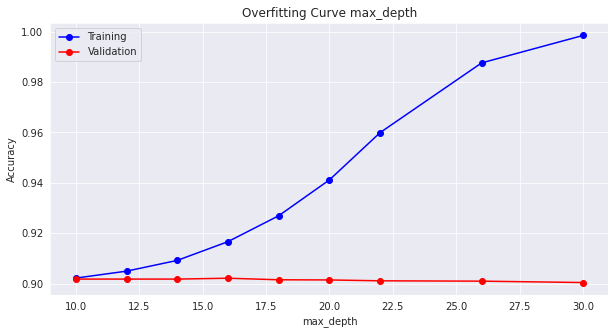

In [115]:
test_and_plot('max_depth', [10, 12, 14, 16, 18, 20,22,26,30], **best_params)

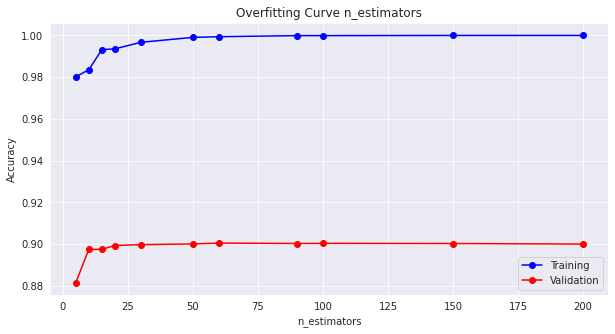

In [116]:
test_and_plot('n_estimators', [5, 10, 15, 20, 30, 50, 60, 90, 100,150,200], **best_params)

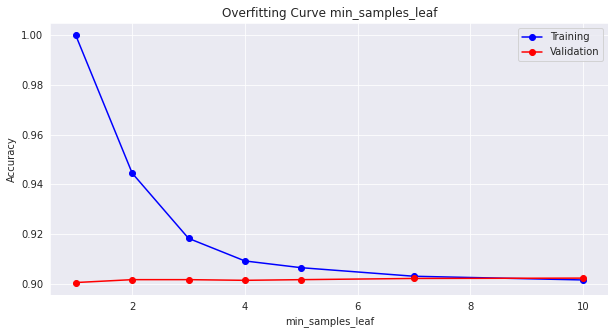

In [117]:
test_and_plot('min_samples_leaf', [1, 2, 3, 4, 5,7,10], **best_params)

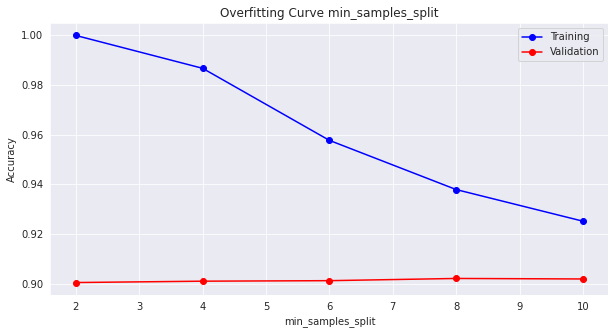

In [118]:
test_and_plot('min_samples_split', [2,4, 6, 8,10], **best_params)


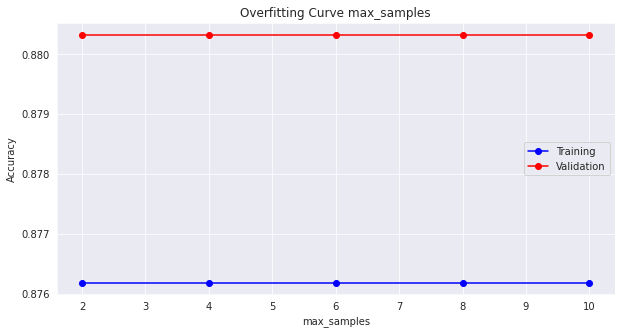

In [119]:
test_and_plot('max_samples', [2,4, 6, 8,10], **best_params)

In [120]:
model=RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=16,random_state=42)
model.fit(inputs,targets)
training_acc=model.score(inputs,targets)
validation_acc=model.score(val_inputs,val_targets)

In [121]:
training_acc,validation_acc

(0.9166923577569965, 0.9021716791121464)

Training Model with the parameter ``` min_sample_split``` ,```min_sample_leaf```

In [122]:
%%time
model1=RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=16,min_samples_split=10,min_samples_leaf=5,random_state=42)
model1.fit(inputs,targets)

CPU times: user 14.9 s, sys: 130 ms, total: 15 s
Wall time: 7.71 s


RandomForestClassifier(max_depth=16, min_samples_leaf=5, min_samples_split=10,
                       n_jobs=-1, random_state=42)

In [123]:
train_acc=model.score(inputs,targets)
val_acc=model.score(val_inputs,val_targets)

In [124]:
train_acc,val_acc

(0.9166923577569965, 0.9021716791121464)

Let's now save and submit the model only with ```n_estimator``` and ```max_depth``` parameters as the accuracy of the model is better with only these two parameter 

In [129]:
test_preds=model.predict_proba(test_df)
submission_df['IsBadBuy']=test_preds[:,1]
submission_df.to_csv('HyperTuned_Random_forest_classifier_Submission.csv',index=False)

# **Summary**

We downloaded, explored, performed EDA(Exploratory Data Analysis), cleaned and trained a few models to automate the process of identifying if a car bought at ann auction is a good buy or a bad buy.

- Our training data had approx 73k rows and test data had with 34 columns.
- We prepared the dataset first by remove the columns which had too many catagories or were too closely correlated and then imputed the missing values in both catagorical columns and numerical columns.
- We also encoded the catagorical columns with One hot encoding and scaled the numerical values using MinMaxScaler.
- As we already has test dataset therefore we split the trainig data into train data and validation data and tarined some dumb models to get a baseline for our models.
- The dataset was also unbalanced and one of the rules in machine learning is, its important to balance out the data set or at least get it close to balance it. The main reason for this is to give equal priority to each class in laymen terms so we balanced the dataset before we trained our model on it.
- We've trained three models mainly: `LogisticRegression`, `DescisionTree` and `RandomForest`.
- `RandomForest` performed better that the rest so performed hyperparameter tuning on it and achieved an accuracy of 90% on the validation dataset and landed in top  of kaggle competition.


![](https://i.imgur.com/tRAe0gN.jpg)




# Future Work

- Performing better feature engineering.
- Optimal Hyperparameter tuning.
- Train Model with XGBOOST, and K-Nearest Neighbour



# References

- Logistic Regression with Scikit-Learn [Jovian Aakash N S ](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/logistic-regression-for-classification)  
 
- Random Forest and Descision Tree [Jovian Aakash N S](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/decision-trees-and-random-forests)

- Scikit Learn Supervised Learning [documentation](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)  
- Decision Tree Classifier [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  
- Random Forest Classifier [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)